In [274]:
import pandas as pd 
import numpy as np
# Read data from file 'filename.csv' 
Iris_data = pd.read_csv("Iris.csv") 
Iris_data.tail()


,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


# 1.The simplest example only classify 2 clusters with 2 features

In [244]:

#setosa and versicolor
X = Iris_data.iloc[:100,0:4]
Y = Iris_data.species[:100]

# create training and testing vars
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)



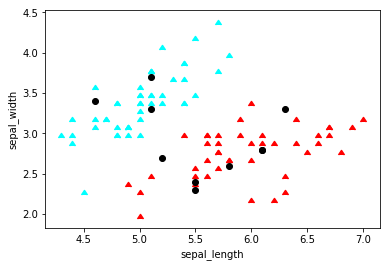

In [259]:

import matplotlib.pyplot as plt
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
#blue triangle presents training sets setosa
plt.scatter(X_train[y_train=="setosa"].sepal_length,X_train[y_train=="setosa"].sepal_width,c = "cyan",marker = 6)
#red circle presents training sets versicolor
plt.scatter(X_train[y_train=="versicolor"].sepal_length,X_train[y_train=="versicolor"].sepal_width,c = "r", marker =6)
#goal of KNN is to classify the label of red color
plt.scatter(X_test.sepal_length,X_test.sepal_width,c = 'black')
plt.show()

In [260]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#confusion table (setosa,versicolor)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

#missclassification error rate
print("misclassification error rate is: ",np.mean(y_pred != y_test))

[[3 0]
 [0 7]]
misclassification error rate is:  0.0


/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


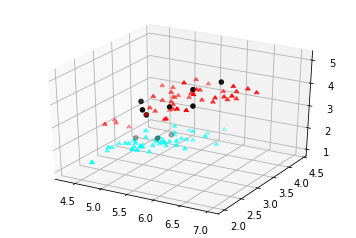

In [266]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train.sepal_length[y_train=="setosa"], X_train.sepal_width[y_train=="setosa"], X_train.petal_length[y_train=="setosa"]
           ,c = "cyan",marker = 6)
ax.scatter(X_train.sepal_length[y_train=="versicolor"], X_train.sepal_width[y_train=="versicolor"], X_train.petal_length[y_train=="versicolor"]
           ,c = "r",marker = 6)
ax.scatter(X_test.sepal_length, X_test.sepal_width, X_test.petal_length,c = "black")
fig.show()


# 2.find optimal tuning parameter k

In [447]:

X = Iris_data.iloc[:,0:4]
Y = Iris_data.species

# create training and testing vars
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


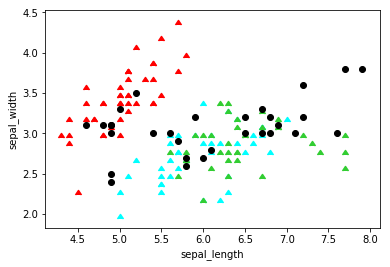

In [448]:

import matplotlib.pyplot as plt
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
#red triangle presents training sets versicolor
plt.scatter(X_train[y_train=="setosa"].sepal_length,X_train[y_train=="setosa"].sepal_width,c = "r",marker = 6)
#cyan triangle circle presents training sets versicolor
plt.scatter(X_train[y_train=="versicolor"].sepal_length,X_train[y_train=="versicolor"].sepal_width,c = "cyan",marker = 6)
#lime triangle circle presents training sets virginica
plt.scatter(X_train[y_train=="virginica"].sepal_length,X_train[y_train=="virginica"].sepal_width,c = "limegreen",marker = 6)


#goal of KNN is to classify the label of red color
plt.scatter(X_test.sepal_length,X_test.sepal_width,c = 'black')
plt.show()

In [449]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#confusion table (versicolor,virginica)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

#missclassification error rate
print("misclassification error rate is: ",np.mean(y_pred != y_test))

[[ 7  0  0]
 [ 0  8  2]
 [ 0  1 12]]
misclassification error rate is:  0.1


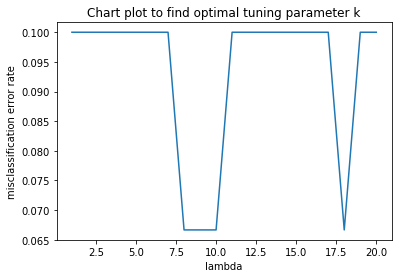

In [450]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
        
plt.plot(range(1,21),error)
plt.ylabel("misclassification error rate")
plt.xlabel("lambda")
plt.title("Chart plot to find optimal tuning parameter k")
plt.show()


# 3. 10-fold cv to find optimal tuning parameter k

In [451]:

X = Iris_data.iloc[:,0:4]
Y = Iris_data.species

# Not necessary to create training and testing containing 3 species 
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


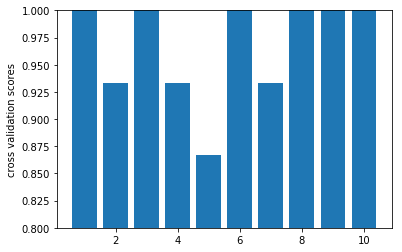

The 10-fold cross validation error rate for k =3 is:  0.03333333333333344


In [452]:
# n-fold cv package import package 
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, X, Y, cv=10)  



plt.bar(range(1,11),scores)
plt.ylim(0.8,1)
plt.ylabel("cross validation scores")
plt.show()

print("The 10-fold cross validation error rate for k =3 is: ", 1-np.mean(scores))

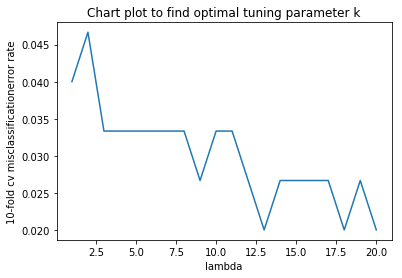

In [453]:
cv_error = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X, Y, cv=10)
    ith_cv_error = 1- np.mean(scores)
    cv_error.append(ith_cv_error)

plt.plot(range(1,21),cv_error)
plt.ylabel("10-fold cv misclassificationerror rate")
plt.xlabel("lambda")
plt.title("Chart plot to find optimal tuning parameter k")
plt.show()